In [1]:
import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.merfish()
adata

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.1.0 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.7
squidpy==1.2.2


100%|██████████████████████████████████████| 49.2M/49.2M [00:05<00:00, 10.2MB/s]


AnnData object with n_obs × n_vars = 73655 × 161
    obs: 'Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'batch'
    uns: 'Cell_class_colors'
    obsm: 'spatial', 'spatial3d'

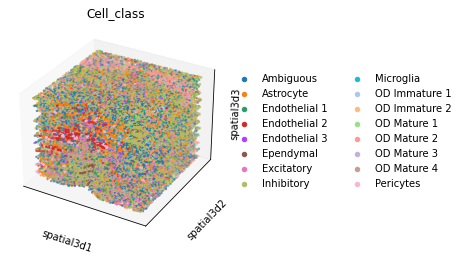

In [2]:
sc.pl.embedding(adata, basis="spatial3d", projection="3d", color="Cell_class")

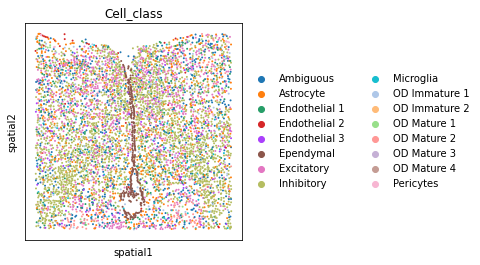

In [3]:
sc.pl.spatial(adata[adata.obs.Bregma == -9], color="Cell_class", spot_size=0.01)

100%|████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.35/s]


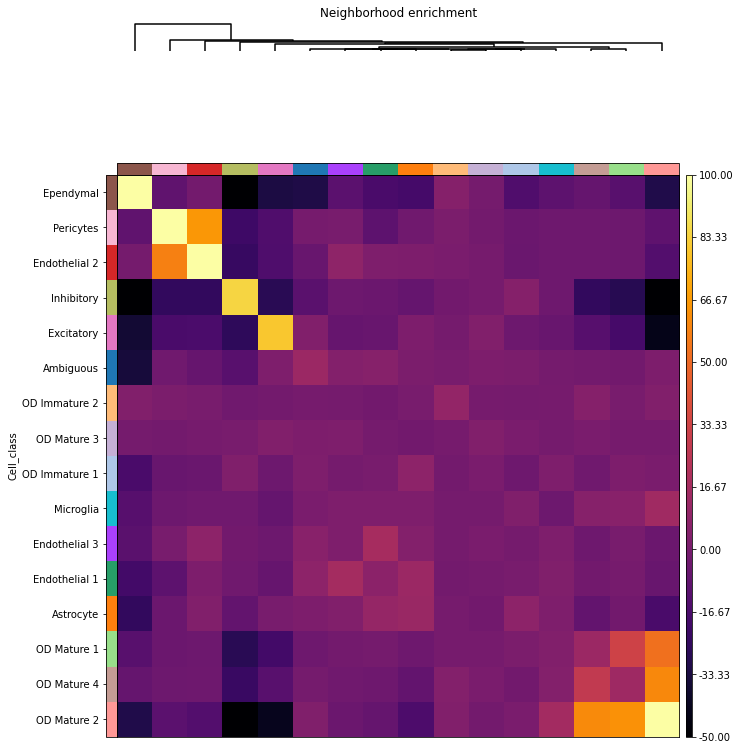

In [6]:
sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key="spatial3d")
sq.gr.nhood_enrichment(adata, cluster_key="Cell_class")
sq.pl.nhood_enrichment(adata, cluster_key="Cell_class", method="single", cmap="inferno", vmin=-50, vmax=100)

100%|████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.46/s]
/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


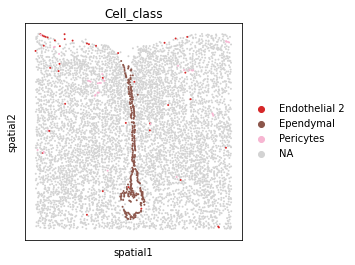

In [7]:
adata_slice = adata[adata.obs.Bregma == -9].copy()
sq.gr.spatial_neighbors(adata_slice, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="Cell_class")
sc.pl.spatial(
    adata_slice,
    color="Cell_class",
    groups=["Ependymal", "Pericytes", "Endothelial 2"],
    spot_size=0.01,
)

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/scanpy/metrics/_gearys_c.py:293: UserWarning: 1 variables were constant, will return nan for these.
  warnings.warn(


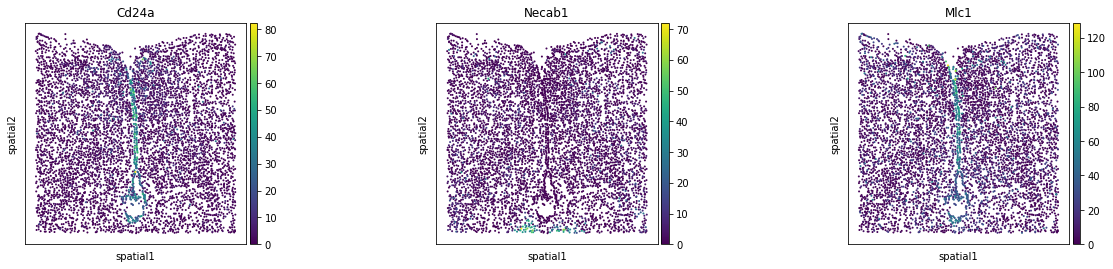

In [8]:
sq.gr.spatial_autocorr(adata_slice, mode="moran")
adata_slice.uns["moranI"].head()
sc.pl.spatial(
    adata_slice,
    color=["Cd24a", "Necab1", "Mlc1"],
    spot_size=0.01,
)

In [9]:
type(adata_slice)

anndata._core.anndata.AnnData

In [ ]:
znc